Many people imagine that data science is mostly machine learning and that data scientists mostly build and train and tweak machine-learning models all day long. (Then again, many of those people don’t actually know what machine learning is.) In fact, data science is mostly turning business problems into data problems and collecting data and understanding data and cleaning data and formatting data, after which machine learning is almost an afterthought.

## `Modeling`

Before we can talk about machine learning we need to talk about models. What is a model? It’s simply a specification of a mathematical (or probabilistic) relationship that exists between different variables. For instance, if you’re trying to raise money for your social networking site, you might build a business model (likely in a spreadsheet) that takes inputs like “number of users” and “ad revenue per user” and “number of employees” and outputs your annual profit for the next several years. A cookbook recipe entails a model that relates inputs like “number of eaters” and “hungriness” to quantities of ingredients needed. And if you’ve ever watched poker on television, you know that they estimate each
player’s “win probability” in real time based on a model that takes into account the cards that have been revealed so far and the distribution of cards in the deck. The business model is probably based on simple mathematical relationships  

## `What Is Machine Learning?`
Everyone has her own exact definition, but we’ll use machine learning to refer to creating and using models that are learned from data. In other contexts this might be called predictive modeling or data mining, but we will stick with machine learning.
Typically, our goal will be to use existing data to develop models that we can use to predict various outcomes for new data, such as:

• Predicting whether an email message is spam or not

• Predicting whether a credit card transaction is fraudulent

• Predicting which advertisement a shopper is most likely to click on

• Predicting which football team is going to win the Super Bowl

## `Overfitting and Underfitting`

Overfitting—producing a model that performs well on the data you train it on but that generalizes poorly to any new data
The other side of this is underfitting, producing a model that doesn’t perform well even on the training data.

-- Source `Data Science from Scratch`

In [1]:
# Spliting data 
def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

In [2]:
def train_test_split(x, y, test_pct):
    data = zip(x, y) # pair corresponding values
    train, test = split_data(data, 1 - test_pct) # split the data set of pairs
    x_train, y_train = zip(*train) # magical un-zip trick
    x_test, y_test = zip(*test)
    return x_train, x_test, y_train, y_test

In [3]:
# model = SomeKindOfModel()
# x_train, x_test, y_train, y_test = train_test_split(xs, ys, 0.33)
# model.train(x_train, y_train)
# performance = model.test(x_test, y_test)

### Correctness
Given a set of labeled data and such a predictive model, every data point lies in one of
our categories:

• True positive: “This message is spam, and we correctly 
predicted spam.”

• False positive (Type 1 Error): “This message is not spam, but we predicted spam.”

• False negative (Type 2 Error): “This message is spam, but we predicted notspam.”

• True negative: “This message is not spam, and we correctly predicted not spam.”

In [4]:
def accuracy(tp,fp,fn,tn):
    correctness = tp + tn
    total = tp + tp + fn + tn
    return correctness/total

print (accuracy(70,4930,13930, 981070)) # Total accuracy

0.9859316277106739


That seems like a pretty impressive number. But clearly this is not a good test, which means that we probably shouldn’t put a lot of credence in raw accuracy.
It’s common to look at the combination of precision and recall.

`Precision measures how accurate our positive predictions were`

In [5]:
def precision(tp,fn,fp,tn):
    return tp/(tp + fp)
print (precision(70,4930,13930,981070))

0.005


`And recall measures what fraction of the positives our model identifie`

`Sometimes precision and recall are combined into the F1 score`
This is the harmonic mean of precision and recall and necessarily lies between them

In [6]:
def recall(tp, fp, fn, tn):
    return tp / (tp + fn)
print (recall(70, 4930, 13930, 981070))

0.005


# K-NN
Imagine that you’re trying to predict how I’m going to vote in the next presidential election. If you know nothing else about me (and if you have the data), one sensible approach is to look at how my neighbors are planning to vote. Living in downtown
Seattle, as I do, my neighbors are invariably planning to vote for the Democratic candidate, which suggests that “Democratic candidate” is a good guess for me as well.

Now imagine you know more about me than just geography—perhaps you know my age, my income, how many kids I have, and so on. To the extent my behavior is influenced (or characterized) by those things, looking just at my neighbors who are close to me among all those dimensions seems likely to be an even better predictor than looking at all my neighbors. This is the idea behind nearest neighbors classification

• Pick one of the winners at random.

• Weight the votes by distance and pick the weighted winner.

• Reduce k until we find a unique winner.

# Naive Bayes
## A Really Dumb Spam Filter
Imagine a “universe” that consists of receiving a message chosen randomly from all possible messages. Let S be the event “the message is spam” and V be the event “the message contains the word viagra.” Then Bayes’s Theorem tells us that the probability
that the message is spam conditional on containing the word viagra is:

        P(S|V) = [P(V|S)P(S)/(P(V|S)P(S) + P(V|¬S)P(¬S)]

The numerator is the probability that a message is spam and contains viagra, while the denominator is just the probability that a message contains viagra. Hence you can think of this calculation as simply representing the proportion of viagra messages that are spam. If we have a large collection of messages we know are spam, and a large collection of messages we know are not spam, then we can easily estimate P(V|S) and P(V|¬S) . If we further assume that any message is equally likely to be spam or not-spam so that P(S) = P(¬S) = (0.5), then:

            P(S|V) = P(V|S)/P(V|S) + P(V|¬S)

For example, if 50% of spam messages have the word viagra, but only 1% of nonspam messages do, then the probability that any given viagra-containing email is spam is:

                    0.5/0.5 + 0.01 = 98%
           
The key to Naive Bayes is making the (big) assumption that the presences (or absences) of each word are independent of one another, conditional on a message being spam or not. Intuitively, this assumption means that knowing whether a certain spam
message contains the word “viagra” gives you no information about whether that same message contains the word “rolex.” In math terms, this means that.

        P(S|X= x) = P(X = x|S)/P(X = x|S) + P(X = x|¬S)
        
The Naive Bayes assumption allows us to compute each of the probabilities on the right simply by multiplying together the individual probability estimates for each vocabulary word.
In practice, you usually want to avoid multiplying lots of probabilities together, to avoid a problem called underflow, in which computers don’t deal well with floatingpoint numbers that are too close to zero. Recalling from algebra that 
log ab = log a + log b and that exp log x = x, we usually compute p1 * ⋯ * pn as the equivalent (but floating-point-friendlier):

exp log p1 + ⋯ + log pn

The only challenge left is coming up with estimates for P(Xi|S) and P(Xi|¬S), the probabilities that a spam message (or nonspam message) contains the word wi. If we have a fair number of “training” messages labeled as spam and not-spam, an obvious
first try is to estimate P Xi S simply as the fraction of spam messages containing word wi. This causes a big problem, though. Imagine that in our training set the vocabulary word “data” only occurs in nonspam messages. Then we’d estimate P “data” S = 0.
The result is that our Naive Bayes classifier would always assign spam probability 0 to any message containing the word “data,” even a message like “data on cheap viagra and authentic rolex watches.” To avoid this problem, we usually use some kind of smoothing.
In particular, we’ll choose a pseudocount—k—and estimate the probability of seeing the ith word in a spam as:
P(Xi|S) = (k + number of spams containing wi)/(2k + number of spams)
Similarly for P(Xi|¬S) . That is, when computing the spam probabilities for the ith word, we assume we also saw k additional spams containing the word and k additional spams not containing the word.

For example, if “data” occurs in 0/98 spam documents, and if k is 1, we estimate P “data” S as 1/100 = 0.01, which allows our classifier to still assign some nonzero spam probability to messages that contain the word “data.”

In [7]:
# Lets implement what we learned
def tokenize(message):
    message = message.lower() # convert to lowercase
    all_words = re.findall("[a-z0-9']+", message) # extract the words
    return set(all_words) # remove duplicates

In [8]:
def count_words(training_set):
    """training set consists of pairs (message, is_spam)"""
    counts = defaultdict(lambda: [0, 0])
    for message, is_spam in training_set:
        for word in tokenize(message):
            counts[word][0 if is_spam else 1] += 1
    return counts

In [9]:
def word_probabilities(counts, total_spams, total_non_spams, k=0.5):
    """turn the word_counts into a list of triplets
    w, p(w | spam) and p(w | ~spam)"""
    return [(w,
             (spam + k) / (total_spams + 2 * k),
             (non_spam + k) / (total_non_spams + 2 * k))
            for w, (spam, non_spam) in counts.iteritems()]

In [10]:
def spam_probability(word_probs, message):
    message_words = tokenize(message)
    log_prob_if_spam = log_prob_if_not_spam = 0.0
    # iterate through each word in our vocabulary
    for word, prob_if_spam, prob_if_not_spam in word_probs:
    # if *word* appears in the message,
    # add the log probability of seeing it
        if word in message_words:
            log_prob_if_spam += math.log(prob_if_spam)
            log_prob_if_not_spam += math.log(prob_if_not_spam)
        # if *word* doesn't appear in the message
        # add the log probability of _not_ seeing it
        # which is log(1 - probability of seeing it)
        else:
            log_prob_if_spam += math.log(1.0 - prob_if_spam)
            log_prob_if_not_spam += math.log(1.0 - prob_if_not_spam)
    prob_if_spam = math.exp(log_prob_if_spam)
    prob_if_not_spam = math.exp(log_prob_if_not_spam)
    return prob_if_spam / (prob_if_spam + prob_if_not_spam)

In [11]:
class NaiveBayesClassifier:
    def __init__(self, k=0.5):
        self.k = k
        self.word_probs = []
    def train(self, training_set):
        # count spam and non-spam messages
        num_spams = len([is_spam
                         for message, is_spam in training_set
                         if is_spam])
        num_non_spams = len(training_set) - num_spams
        # run training data through our "pipeline"
        word_counts = count_words(training_set)
        self.word_probs = word_probabilities(word_counts,
                                             num_spams,
                                             num_non_spams,
                                             self.k)
    def classify(self, message):
        return spam_probability(self.word_probs, message)

# Simple Linear Regression 
                    yi = βxi + α + εi

In [12]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

In [13]:
def error(alpha, beta, x_i, y_i):
    """the error from predicting beta * x_i + alpha
    when the actual value is y_i"""
    return y_i - predict(alpha, beta, x_i)

In [14]:
def sum_of_squared_errors(alpha, beta, x, y):
    return sum(error(alpha, beta, x_i, y_i) ** 2
               for x_i, y_i in zip(x, y))

In [15]:
def least_squares_fit(x, y):
    """given training values for x and y,
    find the least-squares values of alpha and beta"""
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

# Multiple Regression
    minutes = α + β1friends + β2work hours + β3phd + ε
          yi = α + β1xi1 + . . . + βkxik + εi


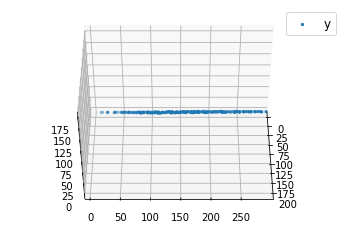

In [16]:
import numpy as np # Geeksforgeeks
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
  
def generate_dataset(n): 
    x = [] 
    y = [] 
    random_x1 = np.random.rand() 
    random_x2 = np.random.rand() 
    for i in range(n): 
        x1 = i 
        x2 = i/2 + np.random.rand()*n 
        x.append([1, x1, x2]) 
        y.append(random_x1 * x1 + random_x2 * x2 + 1) 
    return np.array(x), np.array(y) 
  
x, y = generate_dataset(200) 
  
mpl.rcParams['legend.fontsize'] = 12
  
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show() 

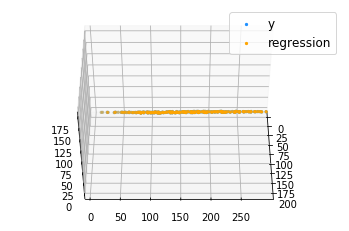

In [17]:
def mse(coef, x, y):  # Geeksforgeeks
    return np.mean((np.dot(x, coef) - y)**2)/2
  
def gradients(coef, x, y): 
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1) 
  
def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8): 
    prev_error = 0
    m_coef = np.zeros(coef.shape) 
    v_coef = np.zeros(coef.shape) 
    moment_m_coef = np.zeros(coef.shape) 
    moment_v_coef = np.zeros(coef.shape) 
    t = 0
  
    while True: 
        error = mse(coef, x, y) 
        if abs(error - prev_error) <= epsilon: 
            break
        prev_error = error 
        grad = gradients(coef, x, y) 
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad 
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t) 
        moment_v_coef = v_coef / (1-b2**t) 
  
        delta = ((lr / moment_v_coef**0.5 + 1e-8) * 
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t))) 
  
        coef = np.subtract(coef, delta) 
    return coef 
  
coef = np.array([0, 0, 0]) 
c = multilinear_regression(coef, x, y, 1e-1) 
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', 
                s = 5, color ="dodgerblue") 
  
ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2], 
                    label ='regression', s = 5, color ="orange") 
  
ax.view_init(45, 0) 
ax.legend() 
plt.show() 

If you want to understand all type of Regression and where it should be used please visit - https://www.listendata.com/2018/03/regression-analysis.html

# Decision Tree
A decision tree uses a tree structure to represent a number of possible decision paths and an outcome for each path.

If you have ever played the game Twenty Questions, then it turns out you are familiar with decision trees. For example:

• “I am thinking of an animal.”

• “Does it have more than five legs?”

• “No.”

• “Is it delicious?”

• “No.”

• “Does it appear on the back of the Australian five-cent coin?”

• “Yes.”

• “Is it an echidna?”

• “Yes, it is!”

Decision trees have a lot to recommend them. They’re very easy to understand and interpret, and the process by which they reach a prediction is completely transparent. Unlike the other models we’ve looked at so far, decision trees can easily handle a mix
of numeric (e.g., number of legs) and categorical (e.g.,  delicious/not delicious) attributes and can even classify data for which attributes are missing.

## Entropy
In order to build a decision tree, we will need to decide what questions to ask and in what order. At each stage of the tree there are some possibilities we’ve eliminated and some that we haven’t. After learning that an animal doesn’t have more than five legs, we’ve eliminated the possibility that it’s a grasshopper. We haven’t eliminated the possibility that it’s a duck. Every possible question partitions the remaining possibilities
according to their answers



In [18]:
def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2)
               for p in class_probabilities
               if p) # ignore zero probabilities

In [19]:
def class_probabilities(labels):
    total_count = len(labels)
    return [count / total_count
            for count in Counter(labels).values()]
def data_entropy(labeled_data):
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels)
    return entropy(probabilities)

In [20]:
def partition_entropy(subsets):
    """find the entropy from this partition of data into subsets
    subsets is a list of lists of labeled data"""
    total_count = sum(len(subset) for subset in subsets)
    return sum( data_entropy(subset) * len(subset) / total_count
               for subset in subsets )

In [21]:
inputs = [
({'level':'Senior', 'lang':'Java', 'tweets':'no', 'phd':'no'}, False),
({'level':'Senior', 'lang':'Java', 'tweets':'no', 'phd':'yes'}, False),
({'level':'Mid', 'lang':'Python', 'tweets':'no', 'phd':'no'}, True),
({'level':'Junior', 'lang':'Python', 'tweets':'no', 'phd':'no'}, True),
({'level':'Junior', 'lang':'R', 'tweets':'yes', 'phd':'no'}, True),
({'level':'Junior', 'lang':'R', 'tweets':'yes', 'phd':'yes'}, False),
({'level':'Mid', 'lang':'R', 'tweets':'yes', 'phd':'yes'}, True),
({'level':'Senior', 'lang':'Python', 'tweets':'no', 'phd':'no'}, False),
({'level':'Senior', 'lang':'R', 'tweets':'yes', 'phd':'no'}, True),
({'level':'Junior', 'lang':'Python', 'tweets':'yes', 'phd':'no'}, True),
({'level':'Senior', 'lang':'Python', 'tweets':'yes', 'phd':'yes'}, True),
({'level':'Mid', 'lang':'Python', 'tweets':'no', 'phd':'yes'}, True),
({'level':'Mid', 'lang':'Java', 'tweets':'yes', 'phd':'no'}, True),
({'level':'Junior', 'lang':'Python', 'tweets':'no', 'phd':'yes'}, False)
]

In [22]:
from collections import defaultdict
def partition_by(inputs, attribute):
    """each input is a pair (attribute_dict, label).
    returns a dict : attribute_value -> inputs"""
    groups = defaultdict(list)
    for input in inputs:
        key = input[0][attribute] # get the value of the specified attribute
        groups[key].append(input) # then add this input to the correct list
    return groups

`This is what’s known as a “greedy” algorithm because, at each step, it chooses the most immediately best option`

In [23]:
def partition_entropy_by(inputs, attribute):
    """computes the entropy corresponding to the given partition"""
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

In [24]:
import math
import collections
from collections import Counter

for key in ['level','lang','tweets','phd']:
    print(key, partition_entropy_by(inputs, key))

level 0.6935361388961919
lang 0.8601317128547441
tweets 0.7884504573082896
phd 0.8921589282623617


In [25]:
senior_inputs = [(input, label)
                 for input, label in inputs if input["level"] == "Senior"]
for key in ['lang', 'tweets', 'phd']:
    print (key, partition_entropy_by(senior_inputs, key))

lang 0.4
tweets 0.0
phd 0.9509775004326938


In [26]:
('level',{'Junior': ('phd', {'no': True, 'yes': False}),
          'Mid': True,
          'Senior': ('tweets', {'no': False, 'yes': True})})

('level',
 {'Junior': ('phd', {'no': True, 'yes': False}),
  'Mid': True,
  'Senior': ('tweets', {'no': False, 'yes': True})})

In [27]:
def classify(tree, input):
    """classify the input using the given decision tree"""
    # if this is a leaf node, return its value
    if tree in [True, False]:
        return tree
    # otherwise this tree consists of an attribute to split on
    # and a dictionary whose keys are values of that attribute
    # and whose values of are subtrees to consider next
    attribute, subtree_dict = tree
    subtree_key = input.get(attribute) # None if input is missing attribute
    if subtree_key not in subtree_dict: # if no subtree for key,
        subtree_key = None # we'll use the None subtree
    subtree = subtree_dict[subtree_key] # choose the appropriate subtree
    return classify(subtree, input) # and use it to classify the input

In [28]:
def build_tree_id3(inputs, split_candidates=None):
    # if this is our first pass,
    # all keys of the first input are split candidates
    if split_candidates is None:
        split_candidates = inputs[0][0].keys()
    # count Trues and Falses in the inputs
    num_inputs = len(inputs)
    num_trues = len([label for item, label in inputs if label])
    num_falses = num_inputs - num_trues
    if num_trues == 0: return False # no Trues? return a "False" leaf
    if num_falses == 0: return True # no Falses? return a "True" leaf
    if not split_candidates: # if no split candidates left
        return num_trues >= num_falses # return the majority leaf
    # otherwise, split on the best attribute
    best_attribute = min(split_candidates,
                         key=partial(partition_entropy_by, inputs))
    partitions = partition_by(inputs, best_attribute)
    new_candidates = [a for a in split_candidates
                      if a != best_attribute]
    # recursively build the subtrees
    subtrees = { attribute_value : build_tree_id3(subset, new_candidates)
                for attribute_value, subset in partitions.items() }
    subtrees[None] = num_trues > num_falses # default case
    return (best_attribute, subtrees)

In [29]:
from functools import partial
tree = build_tree_id3(inputs)
classify(tree, { "level" : "Junior",
                "lang" : "Java",
                "tweets" : "yes",
                "phd" : "no"} ) # True
classify(tree, { "level" : "Junior",
                "lang" : "Java",
                "tweets" : "yes",
                "phd" : "yes"} ) # False

False

In [30]:
classify(tree, { "level" : "Senior" } ) # False

False

In [31]:
classify(tree, { "level" : "Intern" } ) 

True

## Random Forest
Given how closely decision trees can fit themselves to their training data, it’s not surprising that they have a tendency to overfit. One way of avoiding this is a technique called random forests, in which we build multiple decision trees and let them vote on how to classify inputs

## Time Series

In [32]:
from datetime import datetime
now = datetime.now()

In [33]:
now

datetime.datetime(2020, 5, 18, 14, 12, 52, 908332)

In [34]:
now.year, now.month

(2020, 5)

In [35]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)

In [36]:
delta # substracting date 

datetime.timedelta(days=926, seconds=56700)

In [37]:
from datetime import timedelta

In [38]:
start = datetime(2011,1,7)

In [39]:
start

datetime.datetime(2011, 1, 7, 0, 0)

In [40]:
start + timedelta(12) # day is impacted

datetime.datetime(2011, 1, 19, 0, 0)

In [41]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

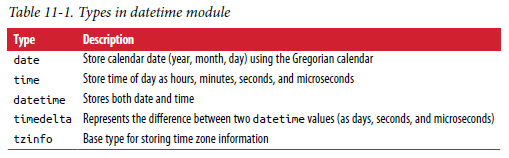

In [42]:
# Converting Bet String and Datetime
stamp = datetime(2011,1,2)

In [43]:
str(stamp)

'2011-01-02 00:00:00'

In [44]:
stamp.strftime('%m-%Y-%d')

'01-2011-02'

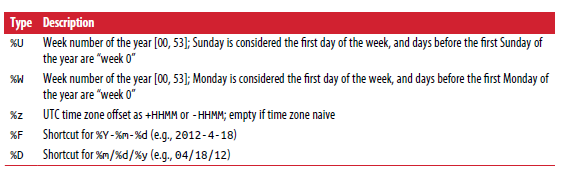
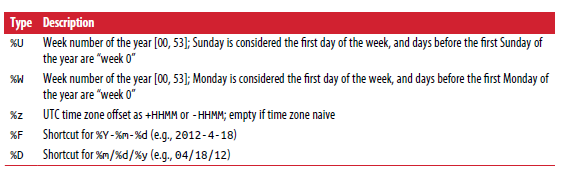

In [45]:
value = '2011-01-03'

In [46]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [47]:
datestrs = ['7/6/2011','8/6/2011']

In [48]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [49]:
from dateutil.parser import parse # to parse date wiht a known format

In [50]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [51]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [52]:
parse('6/12/2011', dayfirst = True)

datetime.datetime(2011, 12, 6, 0, 0)

In [53]:
import pandas as pd
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [54]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [55]:
idx[2]

NaT

In [56]:
pd.isnull(idx)

array([False, False,  True])

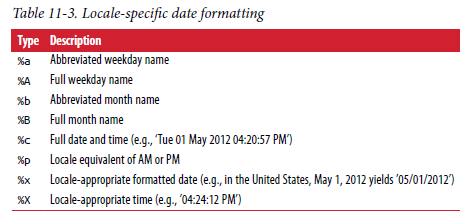

In [57]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.429173
2011-01-05   -0.129071
2011-01-07    0.194924
2011-01-08    1.138709
2011-01-10    1.403618
2011-01-12    0.154898
dtype: float64

In [58]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [59]:
ts + ts[::2]

2011-01-02    0.858346
2011-01-05         NaN
2011-01-07    0.389847
2011-01-08         NaN
2011-01-10    2.807237
2011-01-12         NaN
dtype: float64

In [60]:
# Indexing , Selection and Subsetting
stamp = ts.index[2]

In [61]:
ts[stamp]

0.19492356601332367

In [62]:
ts['1/10/2011']

1.4036184449502223

In [63]:
ts['20110110']

1.4036184449502223

In [64]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [65]:
longer_ts

2000-01-01    0.190524
2000-01-02   -0.257896
2000-01-03    0.039916
2000-01-04   -0.798680
2000-01-05   -1.269197
                ...   
2002-09-22    1.652455
2002-09-23    0.267015
2002-09-24    0.990053
2002-09-25   -0.327514
2002-09-26   -0.837635
Freq: D, Length: 1000, dtype: float64

In [66]:
longer_ts['2001']

2001-01-01    0.507094
2001-01-02   -1.107249
2001-01-03    0.743599
2001-01-04    0.201116
2001-01-05    0.435369
                ...   
2001-12-27   -1.007931
2001-12-28    0.432382
2001-12-29    0.187319
2001-12-30   -0.861273
2001-12-31   -2.057824
Freq: D, Length: 365, dtype: float64

In [67]:
longer_ts['2001-05']

2001-05-01    1.186311
2001-05-02   -1.009086
2001-05-03    0.408693
2001-05-04   -1.136615
2001-05-05   -0.055967
2001-05-06   -0.281564
2001-05-07    2.284915
2001-05-08   -0.054553
2001-05-09   -1.102032
2001-05-10    1.922966
2001-05-11    0.855673
2001-05-12    0.871908
2001-05-13    0.642137
2001-05-14    1.285474
2001-05-15    0.377204
2001-05-16    1.912345
2001-05-17    1.008313
2001-05-18    1.077469
2001-05-19    2.711203
2001-05-20    1.654523
2001-05-21    0.145507
2001-05-22   -0.639949
2001-05-23    1.348642
2001-05-24    0.505010
2001-05-25    0.217415
2001-05-26   -0.910176
2001-05-27    1.871662
2001-05-28   -0.330525
2001-05-29    0.557642
2001-05-30   -0.145583
2001-05-31    0.800248
Freq: D, dtype: float64

In [68]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.194924
2011-01-08    1.138709
2011-01-10    1.403618
2011-01-12    0.154898
dtype: float64

In [69]:
ts

2011-01-02    0.429173
2011-01-05   -0.129071
2011-01-07    0.194924
2011-01-08    1.138709
2011-01-10    1.403618
2011-01-12    0.154898
dtype: float64

In [70]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.194924
2011-01-08    1.138709
2011-01-10    1.403618
dtype: float64

In [71]:
# Truncate, that slices a Series between two dates
ts.truncate(after='1/9/2011')

2011-01-02    0.429173
2011-01-05   -0.129071
2011-01-07    0.194924
2011-01-08    1.138709
dtype: float64

In [72]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.567603,-0.304159,-2.299770,-0.148163
2001-05-09,0.247285,-0.470683,-0.737773,-0.148895
2001-05-16,-1.079345,-0.778821,-1.203603,-0.025984
2001-05-23,-0.628213,-0.483936,-2.925959,0.239082
2001-05-30,-1.592499,-0.314362,0.414311,0.235648


In [73]:
# Time Series with Duplicate Indices
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [74]:
dup_ts.index.is_unique

False

In [75]:
dup_ts['1/3/2000'] # Not duplicate

4

In [76]:
dup_ts['1/2/2000'] # duplicate

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [77]:
grouped = dup_ts.groupby(level = 0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [78]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [79]:
ts

2011-01-02    0.429173
2011-01-05   -0.129071
2011-01-07    0.194924
2011-01-08    1.138709
2011-01-10    1.403618
2011-01-12    0.154898
dtype: float64

In [80]:
resampler = ts.resample('D') #string 'D' is interpreted as daily frequency

In [81]:
resampler

In [82]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [83]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [84]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

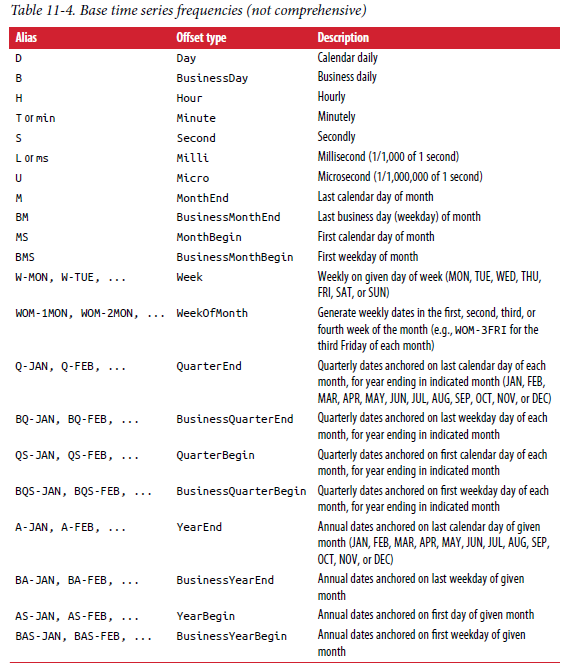

In [85]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [86]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [87]:
from pandas.tseries.offsets import Hour, Minute

In [88]:
hour = Hour()

In [89]:
hour

<Hour>

In [90]:
four_hours = Hour(4)

In [91]:
four_hours

<4 * Hours>

In [92]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='2h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:00:00',
               '2000-01-01 04:00:00', '2000-01-01 06:00:00',
               '2000-01-01 08:00:00', '2000-01-01 10:00:00',
               '2000-01-01 12:00:00', '2000-01-01 14:00:00',
               '2000-01-01 16:00:00', '2000-01-01 18:00:00',
               '2000-01-01 20:00:00', '2000-01-01 22:00:00',
               '2000-01-02 00:00:00', '2000-01-02 02:00:00',
               '2000-01-02 04:00:00', '2000-01-02 06:00:00',
               '2000-01-02 08:00:00', '2000-01-02 10:00:00',
               '2000-01-02 12:00:00', '2000-01-02 14:00:00',
               '2000-01-02 16:00:00', '2000-01-02 18:00:00',
               '2000-01-02 20:00:00', '2000-01-02 22:00:00',
               '2000-01-03 00:00:00', '2000-01-03 02:00:00',
               '2000-01-03 04:00:00', '2000-01-03 06:00:00',
               '2000-01-03 08:00:00', '2000-01-03 10:00:00',
               '2000-01-03 12:00:00', '2000-01-03 14:00:00',
               '2000-01-

In [93]:
Hour(2) + Minute(30)

<150 * Minutes>

In [94]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

One useful frequency class is “week of month,” starting with WOM. This enables you to
get dates like the third Friday of each month

In [95]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [96]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.013415
2000-02-29    0.513224
2000-03-31   -0.089372
2000-04-30   -0.539100
Freq: M, dtype: float64

In [97]:
ts.shift(2) # To shift the values

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.013415
2000-04-30    0.513224
Freq: M, dtype: float64

In [98]:
ts.shift(-2)

2000-01-31   -0.089372
2000-02-29   -0.539100
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [99]:
ts/ts.shift(1) - 1

2000-01-31          NaN
2000-02-29    37.257937
2000-03-31    -1.174139
2000-04-30     5.032073
Freq: M, dtype: float64

In [100]:
ts.shift(2, freq='M') # Shifting the months

2000-03-31    0.013415
2000-04-30    0.513224
2000-05-31   -0.089372
2000-06-30   -0.539100
Freq: M, dtype: float64

In [101]:
ts.shift(3, freq='D')

2000-02-03    0.013415
2000-03-03    0.513224
2000-04-03   -0.089372
2000-05-03   -0.539100
dtype: float64

In [102]:
ts.shift(1, freq='90T') # T here stands for minutes.

2000-01-31 01:30:00    0.013415
2000-02-29 01:30:00    0.513224
2000-03-31 01:30:00   -0.089372
2000-04-30 01:30:00   -0.539100
Freq: M, dtype: float64

In [103]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [104]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [105]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [106]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [107]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [108]:
# Groupby
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.462458
2000-01-19    0.624164
2000-01-23   -1.163218
2000-01-27   -0.034405
2000-01-31    1.602173
2000-02-04    0.183826
2000-02-08    0.677467
2000-02-12    0.237659
2000-02-16   -0.549726
2000-02-20    0.843198
2000-02-24   -0.378159
2000-02-28   -0.703542
2000-03-03    1.175695
2000-03-07    0.160485
2000-03-11    0.585433
2000-03-15    0.064585
2000-03-19    1.152135
2000-03-23   -0.173069
2000-03-27    0.193477
2000-03-31   -0.407920
Freq: 4D, dtype: float64

In [109]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.298234
2000-02-29    0.044389
2000-03-31    0.343853
dtype: float64

In [110]:
ts.resample('M').mean()

2000-01-31    0.298234
2000-02-29    0.044389
2000-03-31    0.343853
Freq: M, dtype: float64

In [111]:
# Time zone handling
import pytz

In [112]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [113]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [114]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.472289
2012-03-10 09:30:00    2.028265
2012-03-11 09:30:00   -1.019019
2012-03-12 09:30:00    0.854779
2012-03-13 09:30:00    0.418236
2012-03-14 09:30:00   -0.735060
Freq: D, dtype: float64

In [115]:
print(ts.index.tz)

None


In [116]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [117]:
ts

2012-03-09 09:30:00   -1.472289
2012-03-10 09:30:00    2.028265
2012-03-11 09:30:00   -1.019019
2012-03-12 09:30:00    0.854779
2012-03-13 09:30:00    0.418236
2012-03-14 09:30:00   -0.735060
Freq: D, dtype: float64

In [118]:
ts_utc = ts.tz_localize('UTC')

In [119]:
ts_utc

2012-03-09 09:30:00+00:00   -1.472289
2012-03-10 09:30:00+00:00    2.028265
2012-03-11 09:30:00+00:00   -1.019019
2012-03-12 09:30:00+00:00    0.854779
2012-03-13 09:30:00+00:00    0.418236
2012-03-14 09:30:00+00:00   -0.735060
Freq: D, dtype: float64

In [120]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [121]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.472289
2012-03-10 04:30:00-05:00    2.028265
2012-03-11 05:30:00-04:00   -1.019019
2012-03-12 05:30:00-04:00    0.854779
2012-03-13 05:30:00-04:00    0.418236
2012-03-14 05:30:00-04:00   -0.735060
Freq: D, dtype: float64

In [122]:
ts_eastern = ts.tz_localize('America/New_York')

In [123]:
ts_eastern

2012-03-09 09:30:00-05:00   -1.472289
2012-03-10 09:30:00-05:00    2.028265
2012-03-11 09:30:00-04:00   -1.019019
2012-03-12 09:30:00-04:00    0.854779
2012-03-13 09:30:00-04:00    0.418236
2012-03-14 09:30:00-04:00   -0.735060
Freq: D, dtype: float64

In [124]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.472289
2012-03-10 14:30:00+00:00    2.028265
2012-03-11 13:30:00+00:00   -1.019019
2012-03-12 13:30:00+00:00    0.854779
2012-03-13 13:30:00+00:00    0.418236
2012-03-14 13:30:00+00:00   -0.735060
Freq: D, dtype: float64

In [125]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.472289
2012-03-10 15:30:00+01:00    2.028265
2012-03-11 14:30:00+01:00   -1.019019
2012-03-12 14:30:00+01:00    0.854779
2012-03-13 14:30:00+01:00    0.418236
2012-03-14 14:30:00+01:00   -0.735060
Freq: D, dtype: float64

In [126]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [127]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')

stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [128]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [129]:
stamp_utc.value

1299902400000000000

In [130]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [131]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [132]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [133]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [134]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [135]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

Operations Between Different Time Zones
If two time series with different time zones are combined, the result will be UTC.
Since the timestamps are stored under the hood in UTC, this is a straightforward
operation and requires no conversion to happen

In [136]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.774043
2012-03-08 09:30:00   -1.266670
2012-03-09 09:30:00    0.154059
2012-03-12 09:30:00    0.175559
2012-03-13 09:30:00    1.088201
2012-03-14 09:30:00   -0.538002
2012-03-15 09:30:00    0.514551
2012-03-16 09:30:00   -0.081381
2012-03-19 09:30:00    1.722379
2012-03-20 09:30:00    0.617637
Freq: B, dtype: float64

In [137]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')